<a href="https://colab.research.google.com/github/meraj687/Heart-Failure-Prediction-with-Machine-Learning-Models/blob/main/HeartPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [4]:
import spacy

In [6]:
nlp = spacy.load("en_core_web_sm")

In [9]:
!pip install opendatasets

import opendatasets as od
od.download("https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction")

import pandas as pd
df = pd.read_csv("heart-failure-prediction/heart.csv")
df.head()

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: mohammadaryaan
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction


100%|██████████| 8.56k/8.56k [00:00<00:00, 12.5MB/s]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [11]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [12]:
df.isnull().shape

(918, 12)

In [14]:
df.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


In [20]:
categorical_cols = df.nunique()
categorical_cols

,0
Age,50
Sex,2
ChestPainType,4
RestingBP,67
Cholesterol,222
FastingBS,2
RestingECG,3
MaxHR,119
ExerciseAngina,2
Oldpeak,53


In [21]:
df_encoded = pd.get_dummies(df)
df_encoded.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,False,True,False,...,False,False,False,True,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,True,False,False,...,True,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,False,True,False,...,False,False,False,False,True,True,False,False,False,True
3,48,138,214,0,108,1.5,1,True,False,True,...,False,False,False,True,False,False,True,False,True,False
4,54,150,195,0,122,0.0,0,False,True,False,...,True,False,False,True,False,True,False,False,False,True


In [24]:
X = df_encoded.drop('HeartDisease', axis=1)
y = df_encoded['HeartDisease']


print(X)
print(y)

     Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  Sex_F  Sex_M  \
0     40        140          289          0    172      0.0  False   True   
1     49        160          180          0    156      1.0   True  False   
2     37        130          283          0     98      0.0  False   True   
3     48        138          214          0    108      1.5   True  False   
4     54        150          195          0    122      0.0  False   True   
..   ...        ...          ...        ...    ...      ...    ...    ...   
913   45        110          264          0    132      1.2  False   True   
914   68        144          193          1    141      3.4  False   True   
915   57        130          131          0    115      1.2  False   True   
916   57        130          236          0    174      0.0   True  False   
917   38        138          175          0    173      0.0  False   True   

     ChestPainType_ASY  ChestPainType_ATA  ChestPainType_NAP  \
0          

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print(X_train)
print(X_test)

     Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  Sex_F  Sex_M  \
795   42        120          240          1    194      0.8  False   True   
25    36        130          209          0    178      0.0  False   True   
84    56        150          213          1    125      1.0  False   True   
10    37        130          211          0    142      0.0   True  False   
344   51        120            0          1    104      0.0  False   True   
..   ...        ...          ...        ...    ...      ...    ...    ...   
106   48        120          254          0    110      0.0   True  False   
270   45        120          225          0    140      0.0  False   True   
860   60        130          253          0    144      1.4  False   True   
435   60        152            0          0    118      0.0  False   True   
102   40        150          392          0    130      2.0   True  False   

     ChestPainType_ASY  ChestPainType_ATA  ChestPainType_NAP  \
795        

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer()

In [30]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [84]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

model = GaussianNB()
model.fit(X_train, y_train)
y_pred_gnb = model.predict(X_test)

print(classification_report(y_test, y_pred_gnb))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85        77
           1       0.93      0.83      0.88       107

    accuracy                           0.86       184
   macro avg       0.86      0.87      0.86       184
weighted avg       0.87      0.86      0.86       184



In [35]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[70  7]
 [18 89]]


In [37]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.8641304347826086


In [38]:
from sklearn.metrics import precision_score
print(precision_score(y_test, y_pred))

0.9270833333333334


In [39]:
from sklearn.metrics import recall_score
print(recall_score(y_test, y_pred))

0.8317757009345794


In [40]:
from sklearn.metrics import f1_score
print(f1_score(y_test, y_pred))

0.8768472906403941


In [63]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred_rf = model.predict(X_test)

print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84        77
           1       0.89      0.87      0.88       107

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.87      0.86      0.86       184



In [66]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train, y_train)

y_pred_kn = model.predict(X_test)

print(classification_report(y_test, y_pred_kn))

              precision    recall  f1-score   support

           0       0.63      0.71      0.67        77
           1       0.77      0.70      0.74       107

    accuracy                           0.71       184
   macro avg       0.70      0.71      0.70       184
weighted avg       0.71      0.71      0.71       184



In [64]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()
model.fit(X_train, y_train)

y_pred_gb = model.predict(X_test)

print(classification_report(y_test, y_pred_gb))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86        77
           1       0.91      0.88      0.90       107

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184



In [52]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, GradientBoostingClassifier


voting_model = VotingClassifier(estimators=[
    ('rf', RandomForestClassifier()),
    ('gb', GradientBoostingClassifier())
], voting='soft')  # 'soft' uses predicted probabilities

voting_model.fit(X_train , y_train)

y_pred = voting_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87        77
           1       0.91      0.90      0.91       107

    accuracy                           0.89       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.89      0.89      0.89       184



In [53]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, GradientBoostingClassifier


voting_model = VotingClassifier(estimators=[
    ('rf', RandomForestClassifier()),
    ('knn', KNeighborsClassifier())
], voting='soft')  # 'soft' uses predicted probabilities

voting_model.fit(X_train , y_train)

y_pred = voting_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84        77
           1       0.91      0.85      0.88       107

    accuracy                           0.86       184
   macro avg       0.86      0.87      0.86       184
weighted avg       0.87      0.86      0.86       184



In [54]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, GradientBoostingClassifier


voting_model = VotingClassifier(estimators=[
    ('knn', KNeighborsClassifier()),
    ('gb', GradientBoostingClassifier())
], voting='soft')  # 'soft' uses predicted probabilities

voting_model.fit(X_train , y_train)

y_pred = voting_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84        77
           1       0.90      0.86      0.88       107

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.87      0.86      0.86       184



In [55]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[67 10]
 [15 92]]


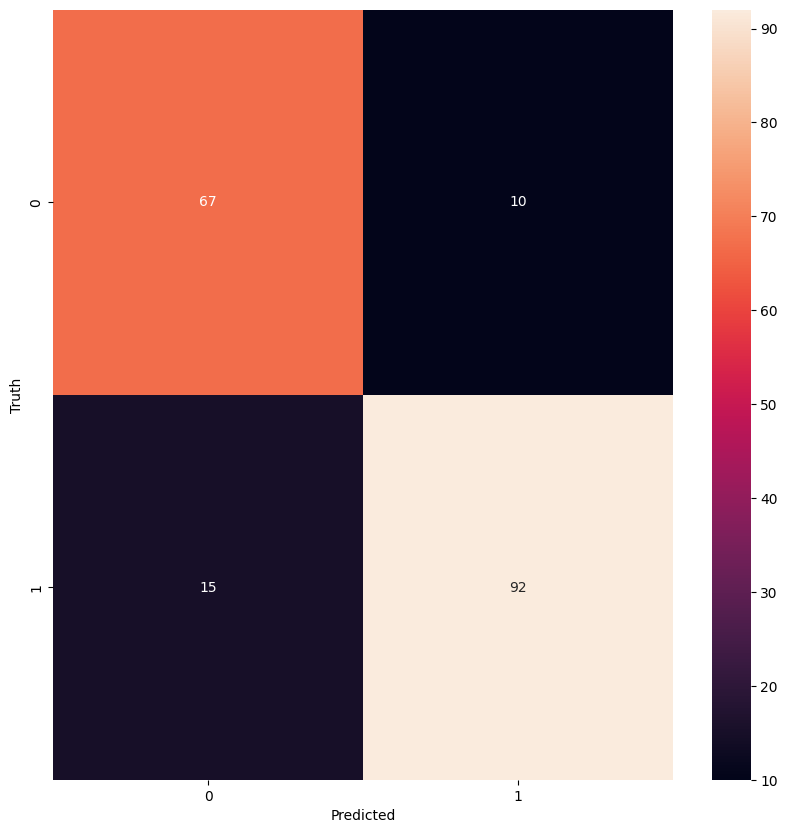

In [56]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

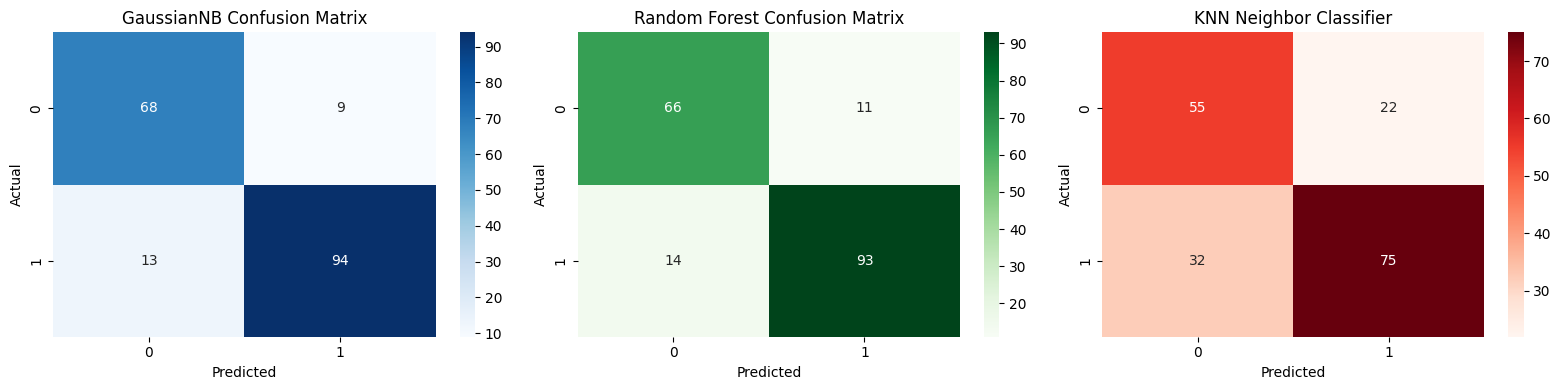

In [79]:
fig, axes = plt.subplots(1, 3, figsize=(16, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_gb), annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("GaussianNB Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

# Random Forest
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title("Random Forest Confusion Matrix")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

# KNN
sns.heatmap(confusion_matrix(y_test, y_pred_kn), annot=True, fmt='d', cmap='Reds', ax=axes[2])
axes[2].set_title("KNN Neighbor Classifier")
axes[2].set_xlabel("Predicted")
axes[2].set_ylabel("Actual")

plt.tight_layout()
plt.show()

<ipython-input-81-28a53b2c03c3>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='HeartDisease', palette='Set3')


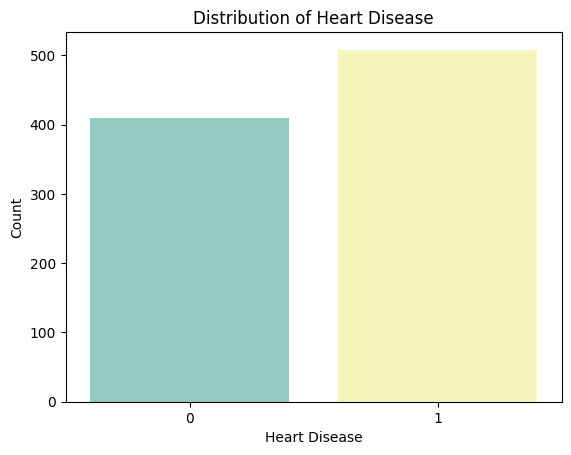

In [81]:
sns.countplot(data=df, x='HeartDisease', palette='Set3')
plt.title('Distribution of Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.show()

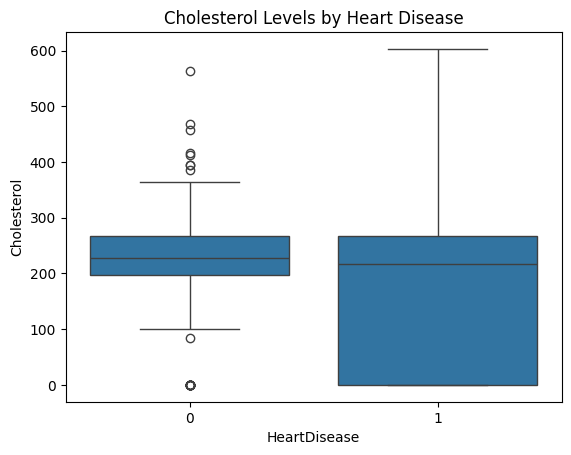

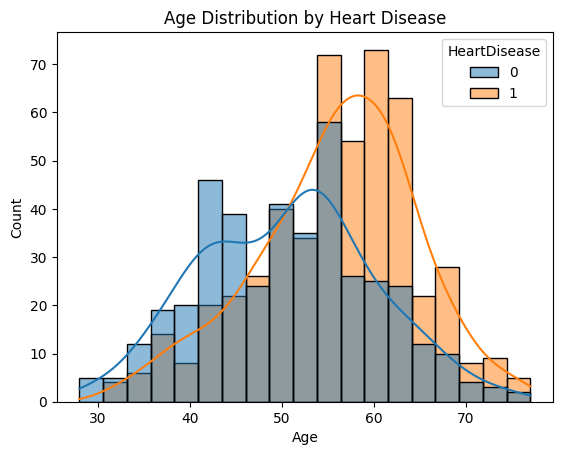

In [82]:
sns.boxplot(x='HeartDisease', y='Cholesterol', data=df)
plt.title("Cholesterol Levels by Heart Disease")
plt.show()

sns.histplot(data=df, x='Age', hue='HeartDisease', kde=True)
plt.title("Age Distribution by Heart Disease")
plt.show()

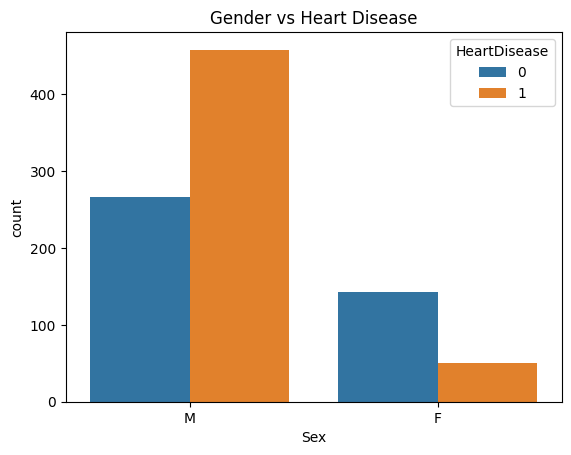

In [83]:
sns.countplot(x='Sex', hue='HeartDisease', data=df)
plt.title("Gender vs Heart Disease")
plt.show()

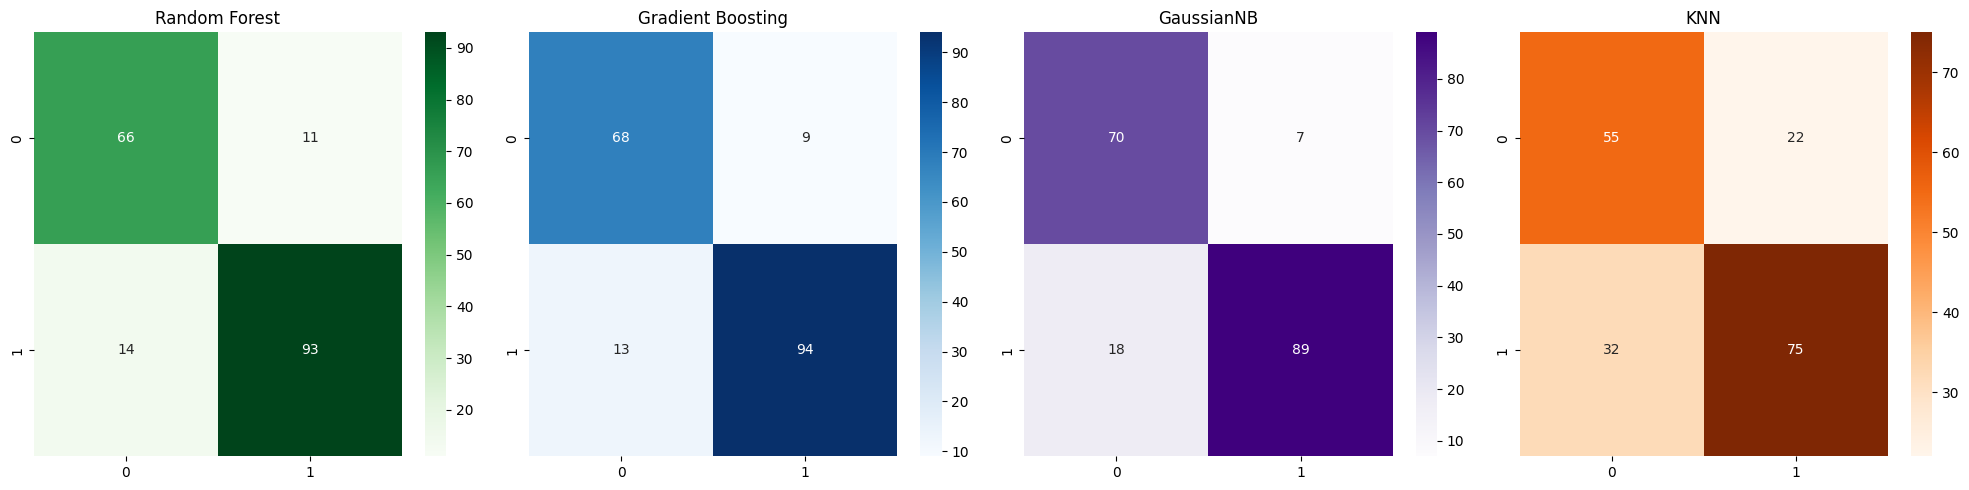

In [85]:
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens', ax=axes[0])
axes[0].set_title("Random Forest")

sns.heatmap(confusion_matrix(y_test, y_pred_gb), annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title("Gradient Boosting")

sns.heatmap(confusion_matrix(y_test, y_pred_gnb), annot=True, fmt='d', cmap='Purples', ax=axes[2])
axes[2].set_title("GaussianNB")

sns.heatmap(confusion_matrix(y_test, y_pred_kn), annot=True, fmt='d', cmap='Oranges', ax=axes[3])
axes[3].set_title("KNN")

plt.tight_layout()
plt.show()


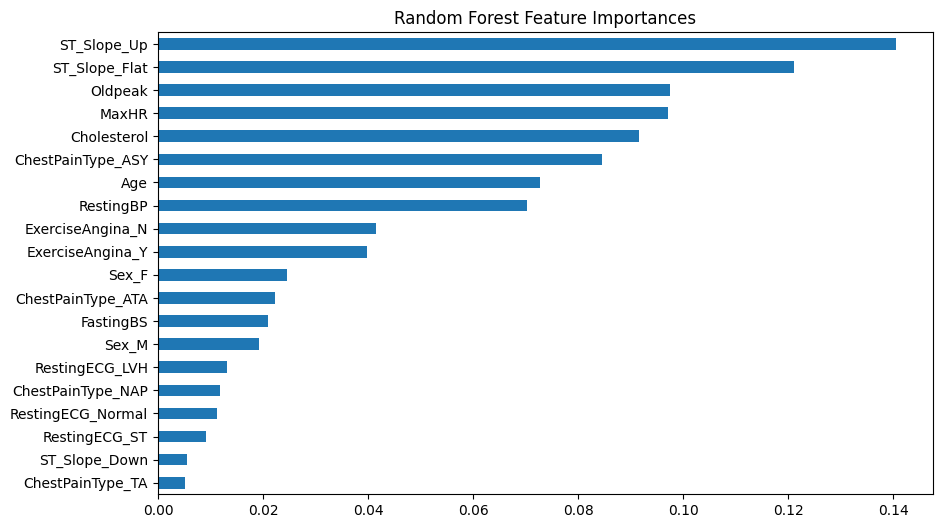

In [91]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import pandas as pd

# Assuming X (features) and y (target) are already defined
model_rf = RandomForestClassifier(random_state=12)
model_rf.fit(X, y)  # Train the model

# Get feature importances
importances = pd.Series(model_rf.feature_importances_, index=X.columns)

# Sort and plot
importances.sort_values().plot(kind='barh', figsize=(10, 6), title="Random Forest Feature Importances")
plt.show()

In [92]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

model_gb = GradientBoostingClassifier(random_state=12)
model_gb.fit(X, y)  # Train the model

stack = StackingClassifier(
    estimators=[
        ('rf', model_rf),
        ('gb', model_gb)
    ],
    final_estimator=LogisticRegression()
)
stack.fit(X_train, y_train)
y_pred_stack = stack.predict(X_test)

print("Stacking Classifier:\n", classification_report(y_test, y_pred_stack))

Stacking Classifier:
               precision    recall  f1-score   support

           0       0.87      0.88      0.88        77
           1       0.92      0.91      0.91       107

    accuracy                           0.90       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.90      0.90      0.90       184

